# Capstone Project Case Study 1: How Does a Bike-Share Navigate Speedy Success?

**Introduction**

Hello there! I recently completed the Coursera Google Data Analytics Professional Certificate program. Students are required to complete a data analysis case study as part of this course to demonstrate the skills learned throughout the course, and here is my take on this project.

I will be working as a Junior Data Analyst in the marketing analyst team at Cyclistic to carry out this project. The data has been made available by Motivate International Inc. under this [license}(https://ride.divvybikes.com/data-license-agreement).

**About the Company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 station across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic's marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to increase the revenue, the company wants to come up with a new marketing strategy to convert casual riders into annual members. The director of marketing, Lily Moreno believes the company's future success depends on maximizing the number of annual memberships. As a result, I've been tasked with analyzing bike usage data to better understand how casual riders and annual members use Cyclistic bikes differently in order to develop a data-driven marketing strategy.

**Objectives**

-   The objective of this project is to show how annual members and casual riders use Cyclistic's bikes differently.

# Ask

**Key Task:** Identify the business task.

-   To better understand how annual members and casual riders use Cyclistic bikes differently, which would serve as an insight for the design marketing strategy team to fulfill their aim by converting casual riders into annual members.

#  Prepare

**Key Task:** A description of all data sources used.

-   Data was made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). It includes cyclistic trip data for a period of 12 months (from 04/2021 to 03/2022).

#  Process

**Key Task:** Documentation of cleaning and manipulation of data.

-   Install required packages

In [1]:
# tidyverse for data import and wrangling
library(tidyverse)
# lubridate for date functions
library(lubridate)
# ggplot for visualization
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Data Import**

-   Each 12-month trip data set (in csv format) was extracted and saved.

In [2]:
# dt is an abbreviation for divvy-tripdata, and the numbers represent each month of data from February 2021 to January 2022
dt1 <- read.csv("../input/cyclistic-bike-share/202104-divvy-tripdata.csv")
dt2 <- read.csv("../input/cyclistic-bike-share/202105-divvy-tripdata.csv")
dt3 <- read.csv("../input/cyclistic-bike-share/202106-divvy-tripdata.csv")
dt4 <- read.csv("../input/cyclistic-bike-share/202107-divvy-tripdata.csv")
dt5 <- read.csv("../input/cyclistic-bike-share/202108-divvy-tripdata.csv")
dt6 <- read.csv("../input/cyclistic-bike-share/202109-divvy-tripdata.csv")
dt7 <- read.csv("../input/cyclistic-bike-share/202110-divvy-tripdata.csv")
dt8 <- read.csv("../input/cyclistic-bike-share/202111-divvy-tripdata.csv")
dt9 <- read.csv("../input/cyclistic-bike-share/202112-divvy-tripdata.csv")
dt10 <- read.csv("../input/cyclistic-bike-share/202201-divvy-tripdata.csv")
dt11 <- read.csv("../input/cyclistic-bike-share/202202-divvy-tripdata.csv")
dt12 <- read.csv("../input/cyclistic-bike-share/202203-divvy-tripdata.csv")

**Merge Data**

-   The data were merged into one dataframe called "tripdata" using the r bind()

In [3]:
tripdata <- rbind(dt1, dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11, dt12)

**Check for data structure**

In [4]:
# check for data structure
str(tripdata)

'data.frame':	5723532 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num

We can see from the output of the dataframe structure above that the data has 5,723,532 rows or observations and 13 columns or variables.

**Data Cleaning**

Now that we have an overview of the dataframe, we will clean the data and prepare for analysis.

**Check for column names**

In [5]:
# check for column names
colnames(tripdata)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [6]:
# rename column name of rideable_type, member_casual using the rename().
tripdata <- rename (tripdata, ride_type = rideable_type, customer_type = member_casual)

In [7]:
#By using the head(), I checked the dataframe to view the first six columns.
head(tripdata)

,ride_id,ride_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


**Check for duplicate and remove duplicated rows on the *rides_id* column.**

-   Trip_data_nd will be the dataframe's new name with no duplicates. Following that, the print function was used to determine how many duplicated rows were removed from the tripdata dataframe.

In [8]:
# Remove duplicate rows of the dataframe using NAME variable
tripdata_nd <-tripdata[!duplicated(tripdata$ride_id),]
# print differences in original data and distinct data
print(paste("Removed", nrow(tripdata) - nrow(tripdata_nd), "duplicated rows"))

[1] "Removed 0 duplicated rows"


The outcome shows that there are no duplicate rows in the ride id column.

**Parse datetime Column**

-   When data is imported, the date-time column is read as a character (string) format. Using the lubridate library, we convert the date-time character to a POSIXct. format using the as. POSIXct method and store both data and time with an associated time zone

Reference [here](https://www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r)

In [9]:
# parsing date-time columns
tripdata_nd$started_at <- as.POSIXct(tripdata_nd$started_at, "%Y-%m-%d %H:%M:%S")
tripdata_nd$ended_at <- as.POSIXct(tripdata_nd$ended_at, "%Y-%m-%d %H:%M:%S")

**Manipulating the Data**

-   Add columns that list the date, day, month and year of each ride. This allow us to aggregate ride data for each month, day, or year. Before completing these operations we could only aggregate at the ride level. More on date formats in R found in this link [link](https://www.statmethods.net/input/dates.html)

In [10]:
# The default format is yyyy-mm-dd
tripdata_nd$date <- as.Date(tripdata_nd$started_at)
tripdata_nd$day <- format(as.Date(tripdata_nd$date), "%d")
tripdata_nd$month <- format(as.Date(tripdata_nd$date), "%m")
tripdata_nd$year <- format(as.Date(tripdata_nd$date), "%Y")
tripdata_nd$day_of_week <- format(as.Date(tripdata_nd$date), "%A")

-   Create a column called "ride_length". Calculate the length of each ride by subtracting the column "started_at" from the column "ended_at".

In [11]:
# Add a "ride_length" calculation to all_trips (in seconds)
tripdata_nd$ride_length <- difftime(tripdata_nd$ended_at,tripdata_nd$started_at)

In [12]:
# Inspect the structure of the columns
str(tripdata_nd)

'data.frame':	5723532 obs. of  19 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ ride_type         : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2021-04-12 18:25:36" "2021-04-27 17:27:11" ...
 $ ended_at          : POSIXct, format: "2021-04-12 18:56:55" "2021-04-27 18:31:29" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  

-   Convert "ride_length" from factor to numeric so we can run calculations on the data.

In [13]:
is.factor(tripdata_nd$ride_length)
tripdata_nd$ride_length <- as.numeric(as.character(tripdata_nd$ride_length))
is.numeric(tripdata_nd$ride_length)

[1] FALSE

[1] TRUE

**Remove bad data**

-   The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative.


In [14]:
nrow(subset(tripdata_nd, ride_length < 0))

[1] 145

The result shows there are 145 negative values in the ride_length column.

-   We will create a new version of the dataframe (v2) since data is being removed

In [15]:
tripdata_nd_v2 <- tripdata_nd[!(tripdata_nd$start_station_name == "HQ QR" | tripdata_nd$ride_length<0),]

-   Removing null values

In [16]:
tripdata_nd_v2 <- tripdata_nd_v2 %>% na.omit()

In [17]:
glimpse(tripdata_nd_v2)

Rows: 5,718,671
Columns: 19
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ ride_type          <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ customer_t

After removing the null values, we now have 5,718,671 row in our dataframe.

# Analyse

-   Conduct a Descriptive analysis on ride_length (all figures in seconds)

In [18]:
# straight average (total ride length / rides)
mean(tripdata_nd_v2$ride_length)
#midpoint number in the ascending array of ride lengths
median(tripdata_nd_v2$ride_length)
# longest ride
max(tripdata_nd_v2$ride_length)
# shortest ride
min(tripdata_nd_v2$ride_length)

[1] 1230.206

[1] 703

[1] 3356649

[1] 0

In [19]:
# An overview of our v2 dataframe using the summary()
summary(tripdata_nd_v2)

   ride_id           ride_type           started_at                 
 Length:5718671     Length:5718671     Min.   :2021-04-01 00:03:18  
 Class :character   Class :character   1st Qu.:2021-06-22 15:24:01  
 Mode  :character   Mode  :character   Median :2021-08-17 18:27:51  
                                       Mean   :2021-08-26 22:30:57  
                                       3rd Qu.:2021-10-14 19:57:02  
                                       Max.   :2022-03-31 23:59:47  
    ended_at                   start_station_name start_station_id  
 Min.   :2021-04-01 00:14:29   Length:5718671     Length:5718671    
 1st Qu.:2021-06-22 15:49:58   Class :character   Class :character  
 Median :2021-08-17 18:46:29   Mode  :character   Mode  :character  
 Mean   :2021-08-26 22:51:28                                        
 3rd Qu.:2021-10-14 20:11:49                                        
 Max.   :2022-04-01 22:10:12                                        
 end_station_name   end_station_id

-   Compare members and casual users

In [20]:
# statistical summary of ride_length by customer_type
tripdata_nd_v2 %>% 
  group_by(customer_type) %>% 
  summarise(avg_ride_lenth = mean(ride_length), median_ride_length = median(ride_length), max_ride_length = max(ride_length), min_ride_length = min(ride_length))

customer_type,avg_ride_lenth,median_ride_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1783.7591,945,3356649,0
member,786.9864,562,89996,0


**Casual vs Members Data Distribution**

- Calculating the percentage of data to members versus casuals.

In [21]:
tripdata_nd_v2 %>% 
  group_by(customer_type) %>% 
  summarise(count = length(ride_id),
    '%' = (length(ride_id) / nrow(tripdata_nd_v2)) * 100)

customer_type,count,%
<chr>,<int>,<dbl>
casual,2542832,44.46544
member,3175839,55.53456


- The average ride time by each day for members vs casual users

In [22]:
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$customer_type + tripdata_nd_v2$day_of_week, FUN = mean)

tripdata_nd_v2$customer_type,tripdata_nd_v2$day_of_week,tripdata_nd_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1694.0952
member,Friday,773.3964
casual,Monday,1772.9065
member,Monday,762.7368
casual,Saturday,1929.4249
member,Saturday,879.9634
casual,Sunday,2093.1459
member,Sunday,898.6127
casual,Thursday,1552.3041


- Notice that the days of the week are out of order. Let's fix that.

In [23]:
tripdata_nd_v2$day_of_week <- ordered(tripdata_nd_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

- Run the average ride time by each day for members vs casual users

In [24]:
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$customer_type + tripdata_nd_v2$day_of_week, FUN = mean)

tripdata_nd_v2$customer_type,tripdata_nd_v2$day_of_week,tripdata_nd_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2093.1459
member,Sunday,898.6127
casual,Monday,1772.9065
member,Monday,762.7368
casual,Tuesday,1558.6002
member,Tuesday,738.7662
casual,Wednesday,1562.3732
member,Wednesday,746.0094
casual,Thursday,1552.3041


- Analyze ridership data by type and weekday

In [25]:
# Uses wday() to create the weekday field, then group by customer type and weekday. Calculates the number of rides and the average duration. Calculates the average time and sort.
tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% group_by(customer_type, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(customer_type, weekday)

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


customer_type,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,482031,2093.1459
casual,Mon,292570,1772.9065
casual,Tue,276024,1558.6002
casual,Wed,286047,1562.3732
casual,Thu,293206,1552.3041
casual,Fri,363766,1694.0952
casual,Sat,549188,1929.4249
member,Sun,387553,898.6127
member,Mon,439294,762.7368


- Analyse ridership data distribution by month

In [26]:
tripdata_nd_v2 %>%
    group_by(month) %>%
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(tripdata_nd_v2)) * 100,
              'members_p' = (sum(customer_type == "member") / length(ride_id)) * 100,
              'casual_p' = (sum(customer_type == "casual") / length(ride_id)) * 100,
              'Member x Casual Perc Difer' = members_p - casual_p)

month,count,%,members_p,casual_p,Member x Casual Perc Difer
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
01,103684,1.813079,82.19301,17.80699,64.386019
02,115532,2.020260,81.51075,18.48925,63.021501
03,283774,4.962237,68.41078,31.58922,36.821555
04,336958,5.892243,59.51602,40.48398,19.032046
05,531179,9.288504,51.69670,48.30330,3.393395
06,728873,12.745496,49.21571,50.78429,-1.568586
07,821666,14.368129,46.27196,53.72804,-7.456071
08,803617,14.052513,48.71923,51.28077,-2.561544
09,755516,13.211391,51.89248,48.10752,3.784963


# Visualize Data
-  Visualize the distribution of data by customer_type

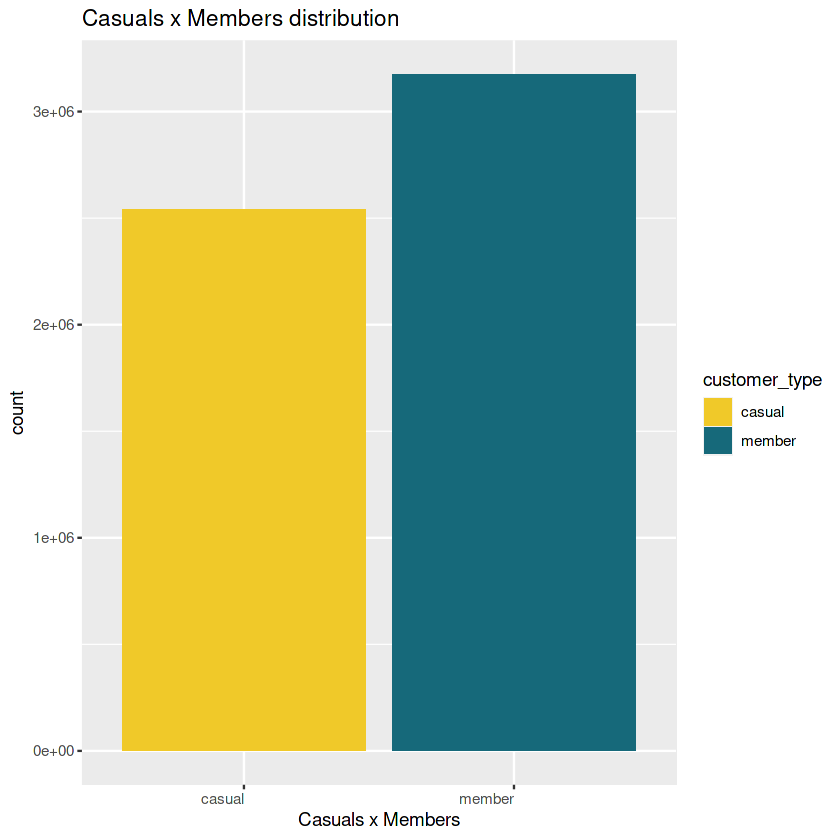

In [27]:
ggplot(tripdata_nd_v2, aes(customer_type, fill = customer_type)) +
    geom_bar() + 
labs(x = "Casuals x Members", title = "Casuals x Members distribution") +
theme(axis.text.x = element_text(hjust = 1)) +
scale_fill_manual(values = c("#F0C929", "#16697A"))

The chart above visualize the percentage differences in customer_type. The dataset contains more members than casuals with a proportional percentage of approximately 55.5% : 44.5%

-  Visualize the number of rides by rider_type


`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.
Warning message:
“Ignoring unknown parameters: vjust”


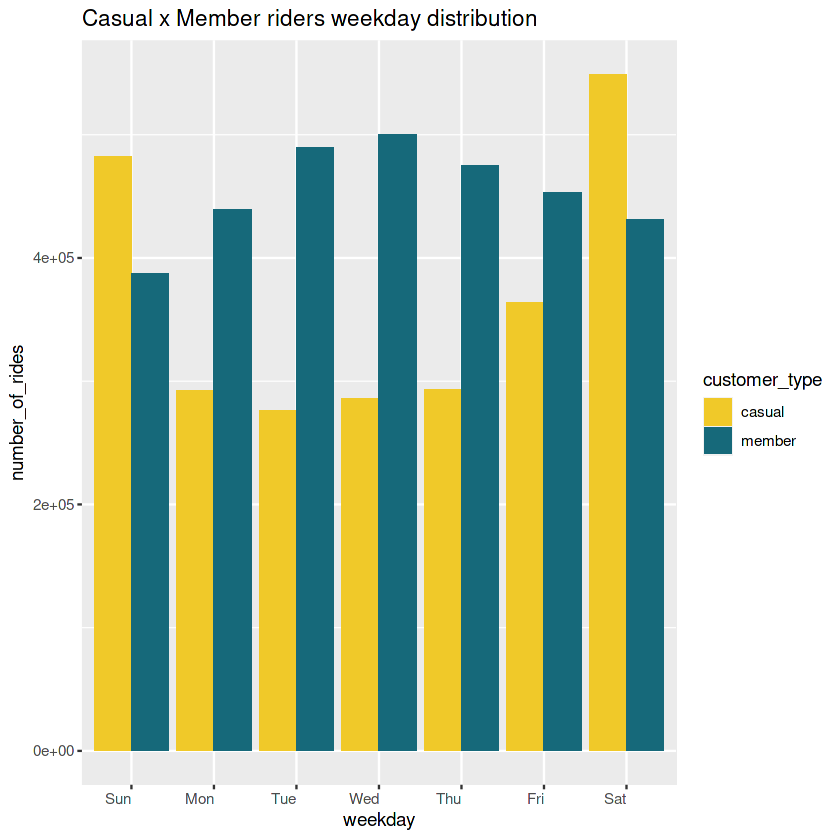

In [28]:
tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(customer_type, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(customer_type, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = customer_type))+
labs(title = "Casual x Member riders weekday distribution")+
theme(axis.text.x = element_text(hjust = 1))+
  geom_col(vjust = 4.0, position = "dodge") +
scale_fill_manual(values = c("#F0C929", "#16697A"))

- Visualize number of rides by month

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


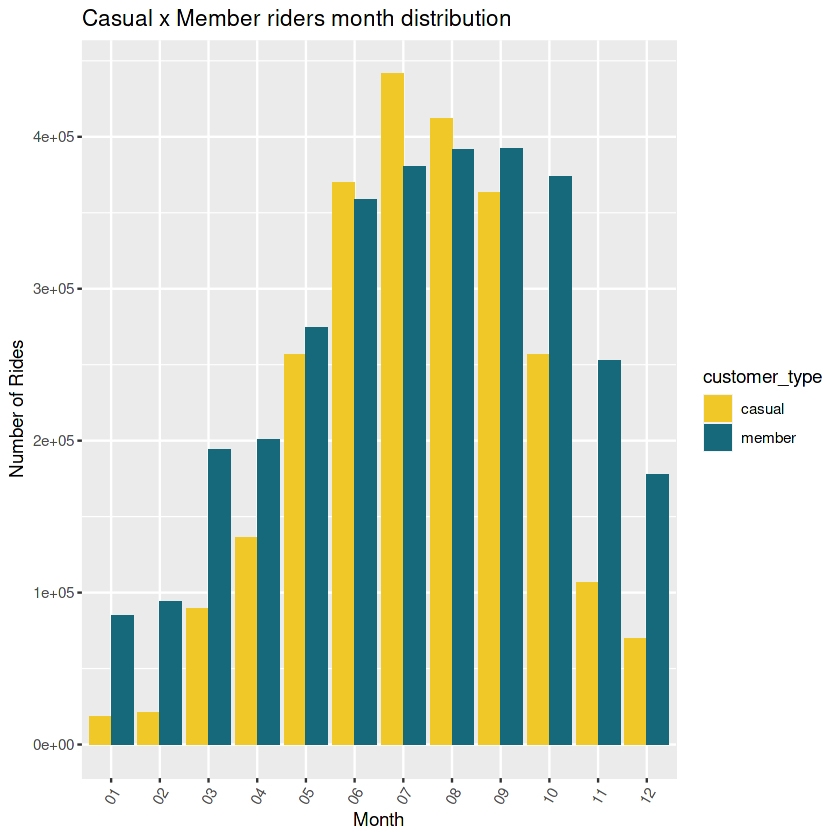

In [29]:
tripdata_nd_v2 %>% 
  group_by(customer_type, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(customer_type, month) %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = customer_type)) +
  geom_col(position = "dodge") + 
labs(title = "Casual x Member riders month distribution", x = "Month", y = "Number of Rides") + 
theme(axis.text.x = element_text(angle = 60, hjust = 1)) + 
scale_fill_manual(values = c("#F0C929", "#16697A"))

- Visualize the average ride length by customer type

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


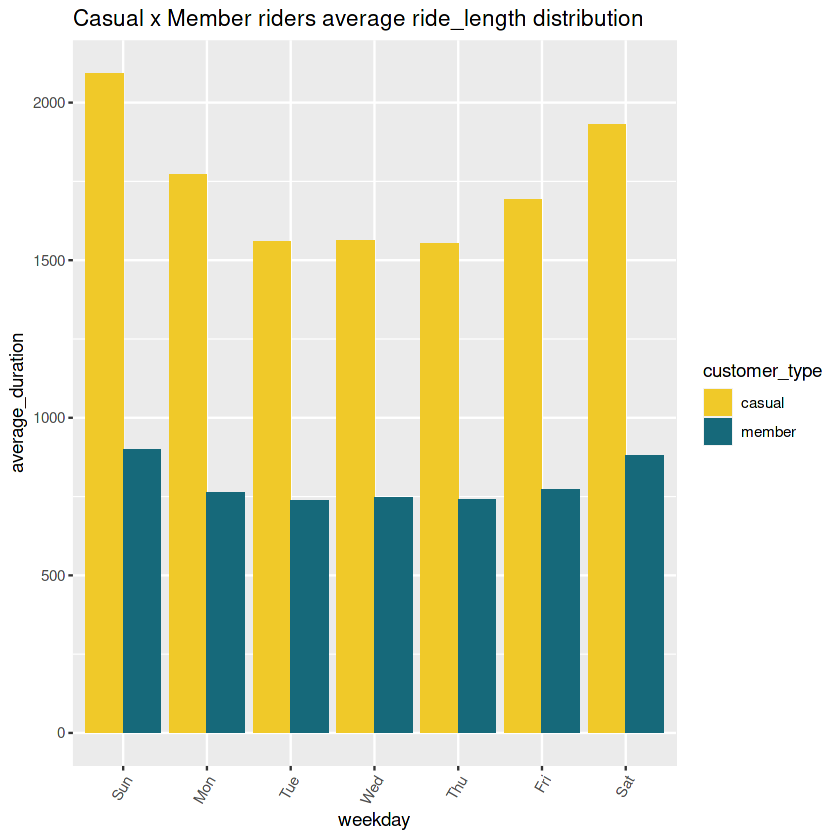

In [30]:
tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(customer_type, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(customer_type, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = customer_type)) +
labs(title = "Casual x Member riders average ride_length distribution") +
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
  geom_col(position = "dodge") +
scale_fill_manual(values = c("#F0C929", "#16697A"))

The output shows the average duration of casual riders are higher than the member riders.

- Visualize the ride_type by day

`summarise()` has grouped output by 'ride_type'. You can override using the
`.groups` argument.


<ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    expand: TRUE
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>

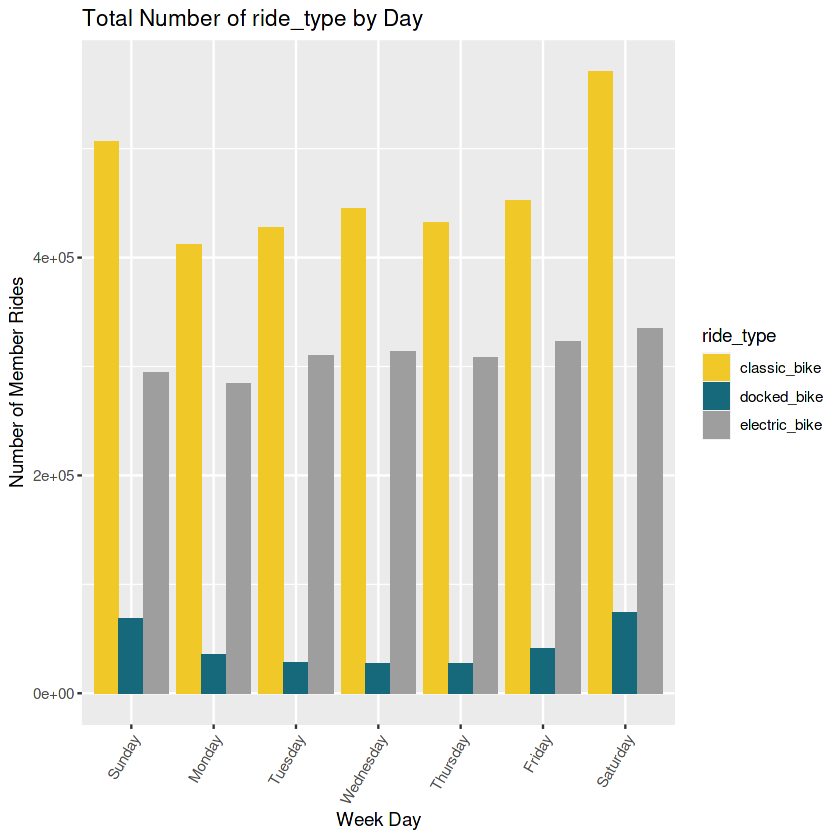

In [31]:
tripdata_nd_v2 %>% 
  group_by(ride_type, day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(ride_type, day_of_week)%>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = ride_type)) +
  geom_col(position = "dodge") + 
labs(title = "Total Number of ride_type by Day", 
     x = "Week Day", 
     y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
scale_fill_manual(values = c("#F0C929", "#16697A", "616F39"))
coord_flip()

According to the chart above, docked_bike is the least used of the three bikes by riders during weekdays. classic_bike being the most popularly used, followed by electric_bike.

- Visualize the ride_type by month

`summarise()` has grouped output by 'ride_type'. You can override using the
`.groups` argument.


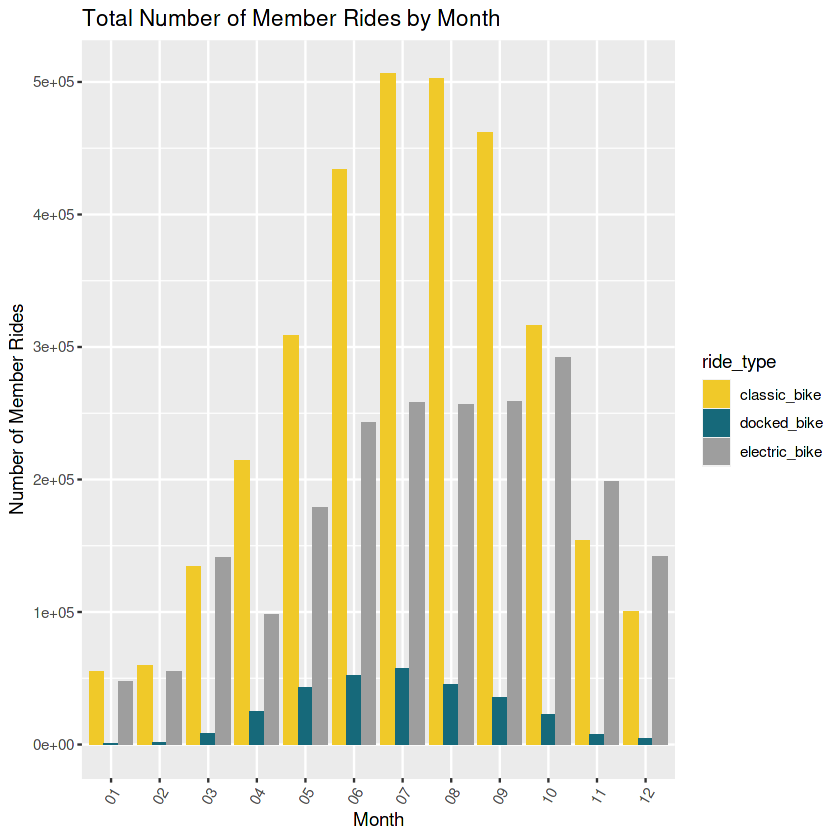

In [32]:
tripdata_nd_v2 %>% 
  group_by(ride_type, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(ride_type, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = ride_type)) +
  geom_col(position = "dodge") + 
labs(title = "Total Number of Member Rides by Month", 
     x = "Month", 
     y = "Number of Member Rides") + 
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
scale_fill_manual(values = c("#F0C929", "#16697A", "616F39"))

From the chart above, classic_bike is mostly used by riders, followed by electric_bike and then docked_bike.

# Share

We could draw the following conclusions from the analysis:

- Casual riders have the longest ride length, which means they ride the most. Casual riders are most active on weekends (i.e. Saturday and Sunday), whereas member riders have the longest rides on Wednesday, which is also evenly distributed across the week, indicating they ride more during the week. In general, we have more member riders than casual riders in our membership.

- In comparison of the ride type, riders prefer the classic bike to electric bike and docked bike. Casual riders have the most rides on Saturday, followed by Sunday, whereas member riders have the most rides spread throughout the week, with it peak on Wednesday.

- And between July and August, both casual and member riders are seen to be more active.

- The average duration of casual riders is more than twice that of member riders.

# Act

- Ads should be created outlining the benefits of using bikes daily especially during the weekdays either to commute to work or just to move around the city - focusing on its benefits in order to lure the casual riders into riding during the week as they are the ones that ride most.

- There should also be campaigns to promote going green and reducing pollution. events can be organized in collaboration with companies that promote green economy.

- Discount should be given to casual riders who decides to subscribe to the annual membership plan as a way to lure the other casual riders into annual riders.

Finally, I'd like to thank the Google Data Analytics Coursera team for meticulously planning and delivering such an amazing course, as well as for providing me with the opportunity to work on the project. 

Thank you to the R community for all of the excellent documentation available on various forums, which assisted me in selecting the appropriate tools and functions to aid in the preparation, processing, and analysis phases.